# Settign up

## Conexión a google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7scxgRnyh3mKNN4T99NCdcQjjHTYqBQZ4qMtMAvCW2Ml4QEnQC_4s
Mounted at /content/drive


In [2]:
%cd ./drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [3]:
%pwd

'/content/drive/MyDrive/Colab Notebooks'

## Importar módulos *_utils

In [5]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')
from my_utils import dataset_utils
from my_utils import eval_utils
from my_utils import results_utils

import pickle

## Plot utils

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plotResultsByParameter(results_df, params_dict, plot_type = 'boxplot', 
                          params2plot = 'ALL', metric = 'mean_val_acc', 
                          y_limits='auto', size=[12,6.75], 
                          title="", x_label="", y_label=""):

  if y_limits == 'auto':
    y_max = results_df[metric].max()+.007
    y_min = results_df[metric].min()-.007
    y_limits = [y_min, y_max]

  if params2plot == 'ALL':
    #parameters_list = ['kernels_combos']
    parameters_list = params_dict.keys()
  else:
    parameters_list = params2plot

  for parameter in parameters_list:
    parameter_values = params_dict[parameter]
    x_labels = [str(v) for v in parameter_values]
    n_labels = len(x_labels)

    fig, axis = plt.subplots(figsize=(size[0], size[1]))
    acc_data = [results_df.loc[results_df[parameter] == p][metric].array for p in parameter_values]

    if plot_type == 'boxplot':
      # BoxPlots
      axis.boxplot(acc_data)
      axis.set_ylim(*y_limits)

      axis.yaxis.grid(True)
      axis.set_xticks([y + 1 for y in range(n_labels)])
      
      if title=="":
        axis.set_title('{} results by {}'.format(metric,parameter))
      else:
        axis.set_title(title)
        
      if x_label=="":
        axis.set_xlabel(parameter)
      else:
        axis.set_xlabel(x_label)

      if y_label=="":
        axis.set_ylabel(metric)
      else:
        axis.set_ylabel(y_label)

    elif plot_type == 'violin':
      # Violin plot
      axis.violinplot(acc_data,
                    positions = [ y + 1 for y in range(n_labels) ],
                    showmeans=False,
                    showmedians=True)
      axis.set_ylim(*y_limits)

      axis.yaxis.grid(True)
      axis.set_xticks([ y + 1 for y in range(n_labels) ])

      if title=="":
        axis.set_title('{} results by {}'.format(metric,parameter))
      else:
        axis.set_title(title)

      if x_label=="":
        axis.set_xlabel(parameter)
      else:
        axis.set_xlabel(x_label)

      if y_label=="":
        axis.set_ylabel(metric)
      else:
        axis.set_ylabel(y_label)

    # add x-tick labels
    plt.setp(axis, xticks=[ y + 1 for y in range(n_labels) ],xticklabels=x_labels)
    plt.show()

# Gráficos de Resultados

## Experimentos de selección de embeddings

In [ ]:
import pickle

encodings_list = ['FT1', 'FT2', 'FT3','W2V300','GloVe300']
results_list = []
for encoding in encodings_list:

  with open(f'./Results/SNN/{encoding}_embeddings_experiments.df', 'rb') as filehandle:
        # store the encoded documents as binary data
        encoding_results = pickle.load(filehandle)

  encoding_results['encoding'] = encoding

  results_list.append(encoding_results)

In [ ]:
from pandas import DataFrame
import pandas as pd
merged_search_results = pd.DataFrame()

for search_results in results_list:
  merged_search_results = pd.concat([merged_search_results, search_results])

merged_search_results.shape 

(1080, 17)

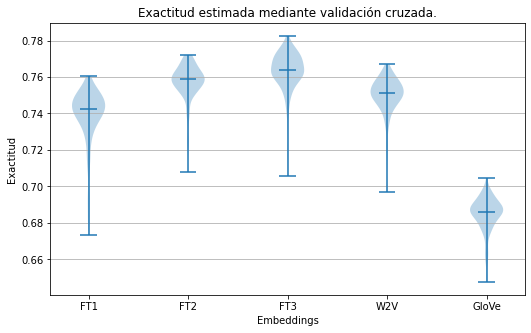

In [ ]:
#source: https://matplotlib.org/3.3.3/gallery/statistics/boxplot_vs_violin.html#sphx-glr-gallery-statistics-boxplot-vs-violin-py
import matplotlib.pyplot as plt
import numpy as np

y_max = merged_search_results['val_acc_A'].max()+.007
y_min = merged_search_results['val_acc_A'].min()-.007
y_limits = [y_min, y_max]

x_labels = ['FT1', 'FT2', 'FT3','W2V','GloVe']
n_labels = len(x_labels)

acc_data = [search_results['val_acc_A'].array for search_results in results_list]
x_positions = [(y + 1) * 1.5 for y in range(n_labels)]

fig, axs = plt.subplots(nrows=1, ncols=1, sharey = False, figsize=(8.5, 5))

axs.violinplot(acc_data,
               positions = x_positions,
               showmeans=False,
               showmedians=True)
axs.set_title('Exactitud estimada mediante validación cruzada.')
axs.set_ylim(*y_limits)

axs.yaxis.grid(True)
axs.set_xticks(x_positions)
axs.set_xlabel('Embeddings')
axs.set_ylabel('Exactitud')

# add x-tick labels
plt.setp(axs, xticks=x_positions,xticklabels=x_labels)
plt.show()

## Experimentos con redes convolucionales

### Tamaño de las capas convolucionales

In [47]:
import pickle
with open('./Results/CNN/HS/experiments_1.df', 'rb') as file_handler:
  search_results = pickle.load(file_handler)

search_results.shape

(120, 19)

In [48]:
from itertools import combinations
from itertools import product

candidate_kernels = [1,2,3,4,5]
kernels_combos = list(combinations(candidate_kernels, 3))

params_dict = {'kernels_combos':kernels_combos}

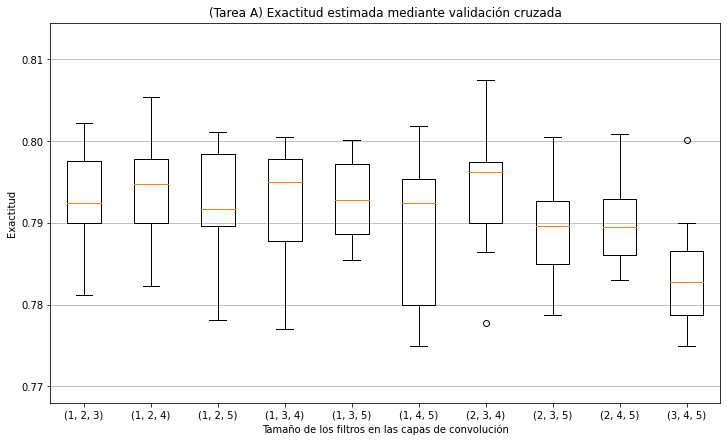

In [53]:
plotResultsByParameter(search_results, 
                        params_dict,
                        params2plot=['kernels_combos'],
                        size=[12,7],
                        title="(Tarea A) Exactitud estimada mediante validación cruzada",
                        x_label="Tamaño de los filtros en las capas de convolución",
                        y_label="Exactitud",
                        metric='val_acc_A')

### Tarea A (HS)

In [54]:
import pickle
with open('./Results/CNN/HTA/HTA_kernels_experiments.df', 'rb') as file_handler:
  search_results = pickle.load(file_handler)

search_results.shape

(120, 19)

In [55]:
from itertools import combinations
from itertools import product

candidate_kernels = [1,2,3,4,5]
kernels_combos = list(combinations(candidate_kernels, 3))

params_dict = {'kernels_combos':kernels_combos}

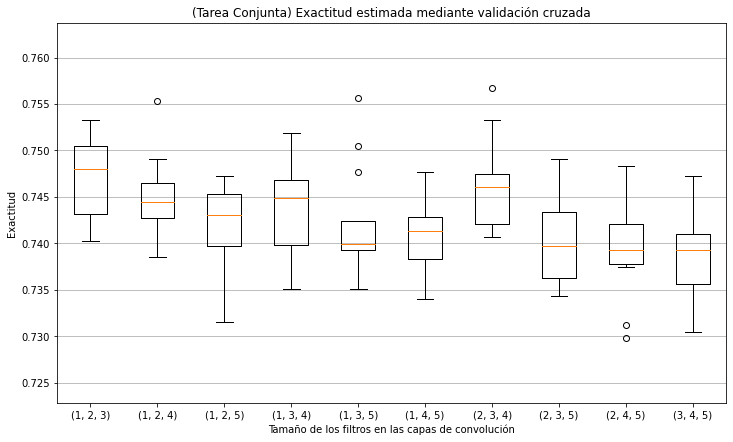

In [57]:
plotResultsByParameter(search_results, 
                        params_dict,
                        params2plot=['kernels_combos'],
                        size=[12,7],
                        title="(Tarea Conjunta) Exactitud estimada mediante validación cruzada",
                        x_label="Tamaño de los filtros en las capas de convolución",
                        y_label="Exactitud",
                        metric='val_acc_A')

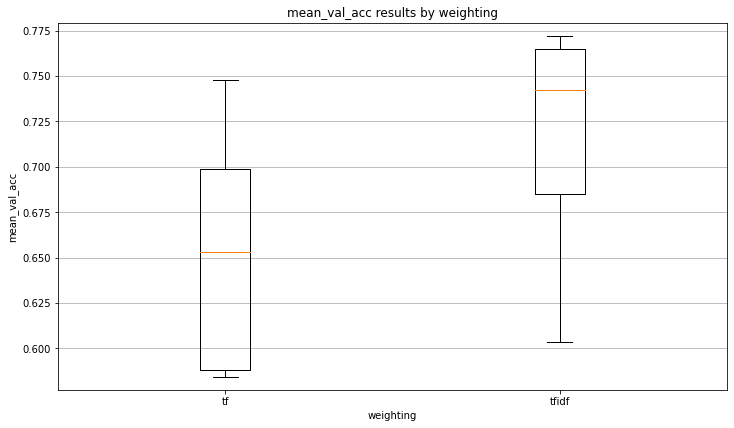

In [ ]:
results_utils.plotResultsByParameter1(results_df, 
                                      params_dict={'weighting':['tf', 'tfidf']},
                                      params2plot=['weighting'])

### Resultados por tipo de kernel

In [ ]:
# ** for this we only consider those configurations where weighting='tfidf'
results_subset = results_df.loc[results_df['weighting']=='tfidf']

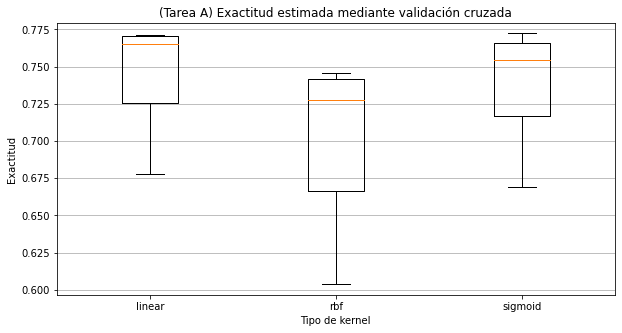

In [ ]:
plotResultsByParameter1(results_subset, 
                        params_dict={'kernel':['linear','rbf','sigmoid']},
                        params2plot=['kernel'],
                        size=[10,5],
                        title="(Tarea A) Exactitud estimada mediante validación cruzada",
                        x_label="Tipo de kernel",
                        y_label="Exactitud")

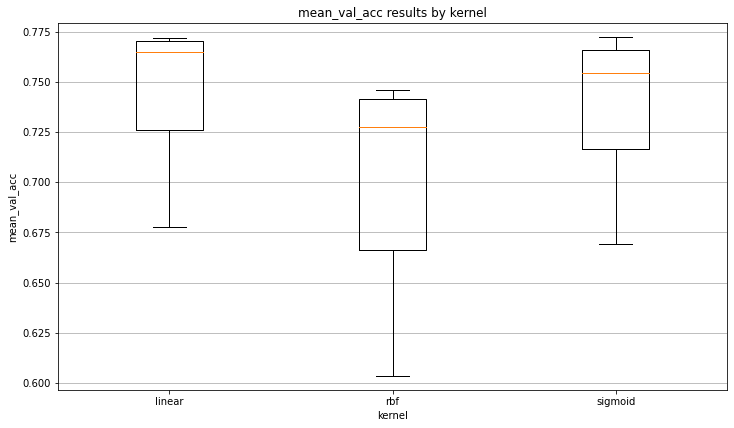

In [ ]:
results_utils.plotResultsByParameter1(results_subset, 
                                      params_dict={'kernel':['linear','rbf','sigmoid']},
                                      params2plot=['kernel'])

### Resultados por factor de penalización

** for this we only consider those configurations where weighting='tfidf'

In [ ]:
results_subset = results_df.loc[results_df['weighting']=='tfidf']

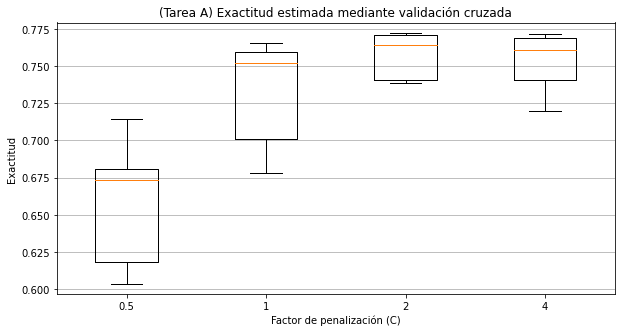

In [ ]:
plotResultsByParameter1(results_subset, 
                        params_dict={'C':[0.5,1,2,4]},
                        params2plot=['C'],
                        size=[10,5],
                        title="(Tarea A) Exactitud estimada mediante validación cruzada",
                        x_label="Factor de penalización (C)",
                        y_label="Exactitud")

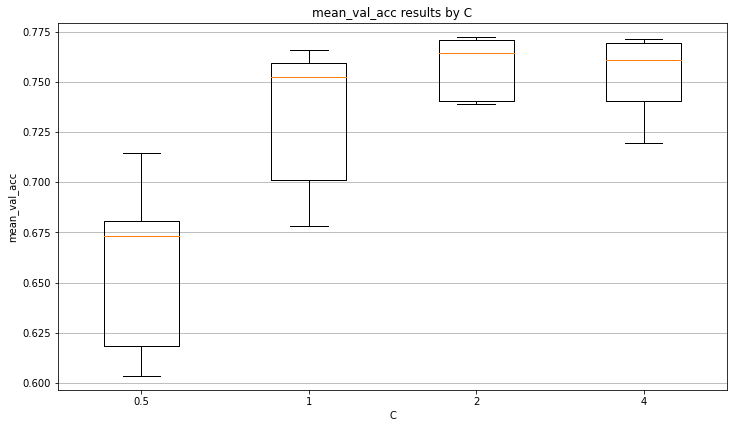

In [ ]:
results_utils.plotResultsByParameter1(results_subset, 
                                      params_dict={'C':[0.5,1,2,4]},
                                      params2plot=['C'])

### Resumen de los resultados (HS)

* Método de ponderación: TFIDF
* Tipo de kernel: ['linear', 'sigmoid']
* Parámetro de penalización: [1, **2, 4**]

## HTA

In [ ]:
import pickle
with open('./Results/SVC/phase-1/HTA.df', 'rb') as file_handler:
  results_df = pickle.load(file_handler)

In [ ]:
results_df.head()

### Resultados por método de ponderación

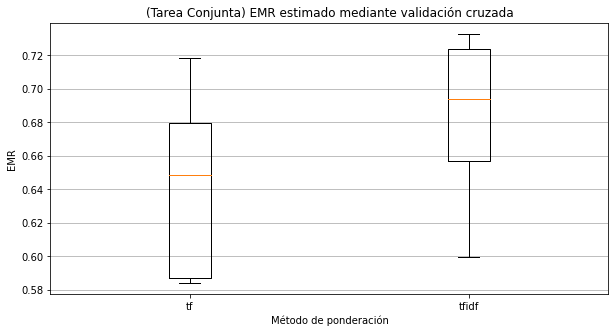

In [ ]:
plotResultsByParameter1(results_df, 
                        params_dict={'weighting':['tf', 'tfidf']},
                        params2plot=['weighting'],
                        size=[10,5],
                        title="(Tarea Conjunta) EMR estimado mediante validación cruzada",
                        x_label="Método de ponderación",
                        y_label="EMR")

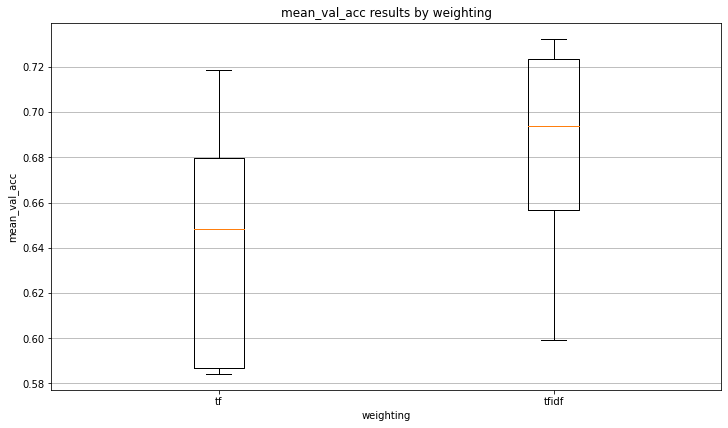

In [ ]:
results_utils.plotResultsByParameter1(results_df, 
                                      params_dict={'weighting':['tf', 'tfidf']},
                                      params2plot=['weighting'])

### Resultados por tipo de kernel

** for this we only consider those configurations where weighting='tfidf'

In [ ]:
results_subset = results_df.loc[results_df['weighting']=='tfidf']

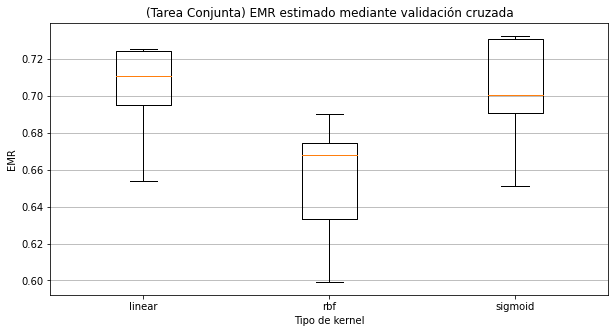

In [ ]:
plotResultsByParameter1(results_subset, 
                        params_dict={'kernel':['linear','rbf','sigmoid']},
                        params2plot=['kernel'],
                        size=[10,5],
                        title="(Tarea Conjunta) EMR estimado mediante validación cruzada",
                        x_label="Tipo de kernel",
                        y_label="EMR")

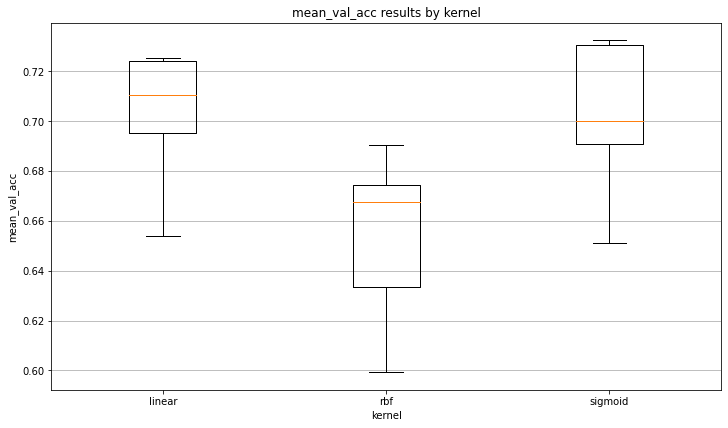

In [ ]:
results_utils.plotResultsByParameter1(results_subset, 
                                      params_dict={'kernel':['linear','rbf','sigmoid']},
                                      params2plot=['kernel'])

### Resultados en función del parámetro de penalización

** for this we only consider those configurations where weighting='tfidf'

In [ ]:
results_subset = results_df.loc[results_df['weighting']=='tfidf']

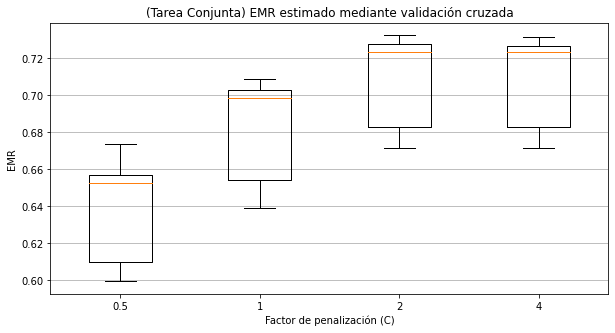

In [ ]:
plotResultsByParameter1(results_subset, 
                        params_dict={'C':[0.5,1,2,4]},
                        params2plot=['C'],
                        size=[10,5],
                        title="(Tarea Conjunta) EMR estimado mediante validación cruzada",
                        x_label="Factor de penalización (C)",
                        y_label="EMR")

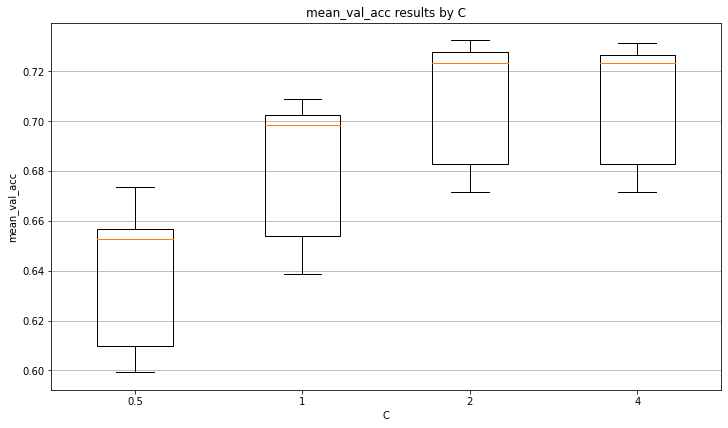

In [ ]:
results_utils.plotResultsByParameter1(results_subset, 
                                      params_dict={'C':[0.5,1,2,4]},
                                      params2plot=['C'])

### Resumen de los resultados (HTA)

* Método de ponderación: TFIDF
* Tipo de kernel: ['linear', 'sigmoid']
* Parámetro de penalización: [**2, 4**]